# Project Overview

This prolect is divided into five parts; they are:
1. Power Consumption Dataset
2. Load Dataset
3. Patterns in Observations Over Time
4. Time Series Data Distributions
5. Ideas on Modeling

# Household Power Consumption Dataset
The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years.

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.
It is a multivariate series comprised of seven variables (besides the date and time); they are:
1. global_active_power: The total active power consumed by the household (kilowatts).
2. global_reactive_power: The total reactive power consumed by the household (kilowatts).
3. voltage: Average voltage (volts).
4. global_intensity: Average current intensity (amps).
5. sub_metering_1: Active energy for kitchen (watt-hours of active energy).
6. sub_metering_2: Active energy for laundry (watt-hours of active energy).
7. sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

Active and reactive energy refer to the technical details of alternative current.
In general terms, the active energy is the real power consumed by the household, whereas the reactive energy is the unused power in the lines.

# Load Dataset
The dataset can be downloaded from the UCI Machine Learning repository as a single 20 megabyte .zip file:
household_power_consumption.zip

We will download the dataset and unzip it into our current working directory. we will now have the file “household_power_consumption.txt” that is about 127 megabytes in size and contains all of the observations

Lets get started

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# summarize
print(dataset.shape)

# mark all missing values
dataset.replace('?', nan, inplace=True)

# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# save updated dataset
dataset.to_csv('household_power_consumption.csv')

# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
dataset.head()

(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtypes: float64(8)
memory usage: 142.5 MB


### Patterns in Observations Over Time
The data is a multivariate time series and the best way to understand a time series is to create line plots.
We can start off by creating a separate line plot for each of the eight variables.

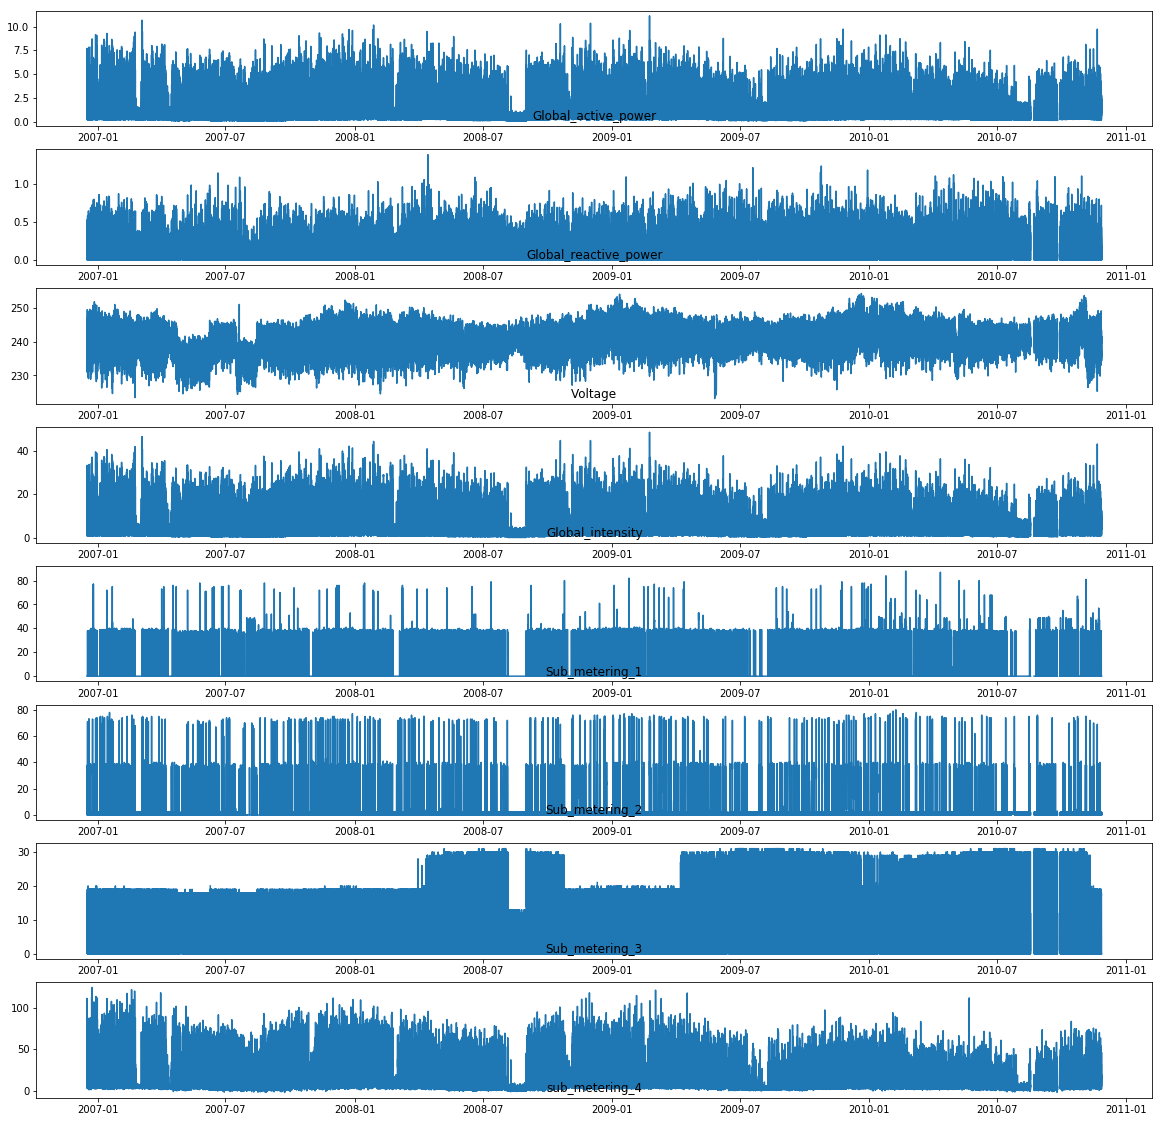

In [92]:
# line plot for each variable

pyplot.figure(figsize(20,20))

for i in range(len(dataset.columns)):
    pyplot.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    pyplot.plot(dataset[name])
    pyplot.title(name, y=0)


pyplot.show()


Running the example creates a single image with eight subplots, one for each variable.

This gives us a really high level of the four years of one minute observations. We can see that something interesting was going on in ‘Sub_metering_3‘ (environmental control) that may not directly map to hot or cold years. Perhaps new systems were installed.

Interestingly, the contribution of ‘sub_metering_4‘ seems to decrease with time, or show a downward trend, perhaps matching up with the solid increase in seen towards the end of the series for ‘Sub_metering_3‘.

These observations do reinforce the need to honor the temporal ordering of subsequences of this data when fitting and evaluating any model.

We might be able to see the wave of a seasonal effect in the ‘Global_active_power‘ and some other variates.
There is some spiky usage that may match up with a specific period, such as weekends.

Let’s zoom in and focus on the ‘Global_active_power‘, or ‘active power‘ for short.
We can create a new plot of the active power for each year to see if there are any common patterns across the years. The first year, 2006, has less than one month of data, so will remove it from the plot.

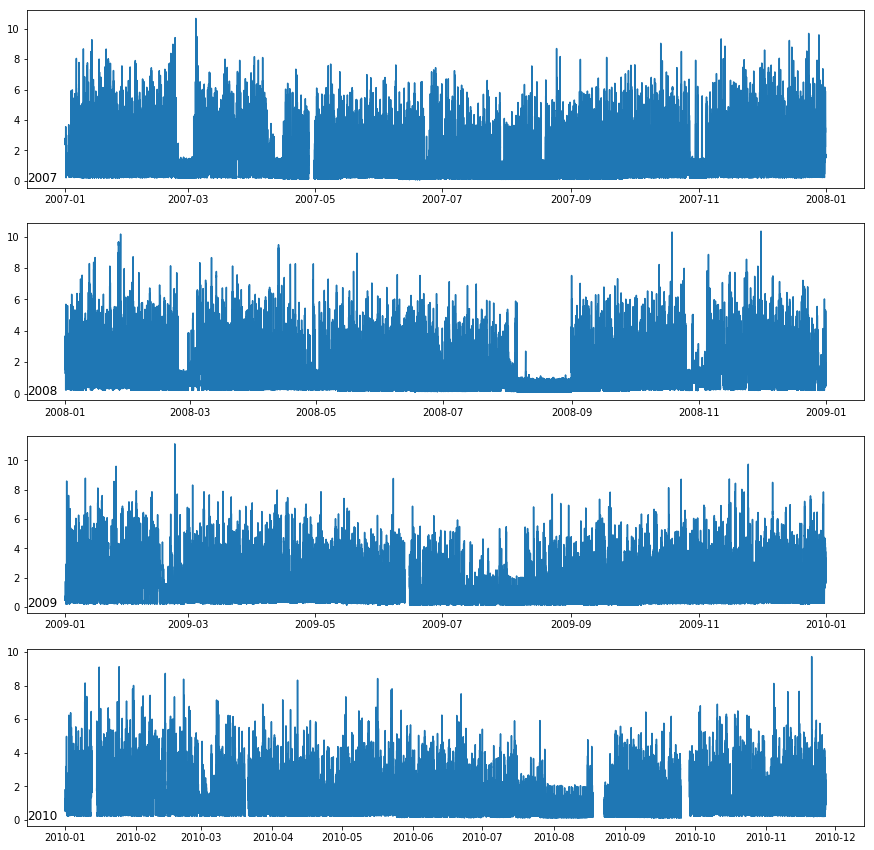

In [101]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize(15,15))

for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    
    # determine the year to plot
    year = years[i]
    
    # get all observations for the year
    result = dataset[str(year)]
    
    # plot the active power for the year
    pyplot.plot(result['Global_active_power'])
    
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='left')
pyplot.show()

We can continue to zoom in on consumption and look at active power for each of the 12 months of 2007.
This might help tease out gross structures across the months, such as daily and weekly patterns.

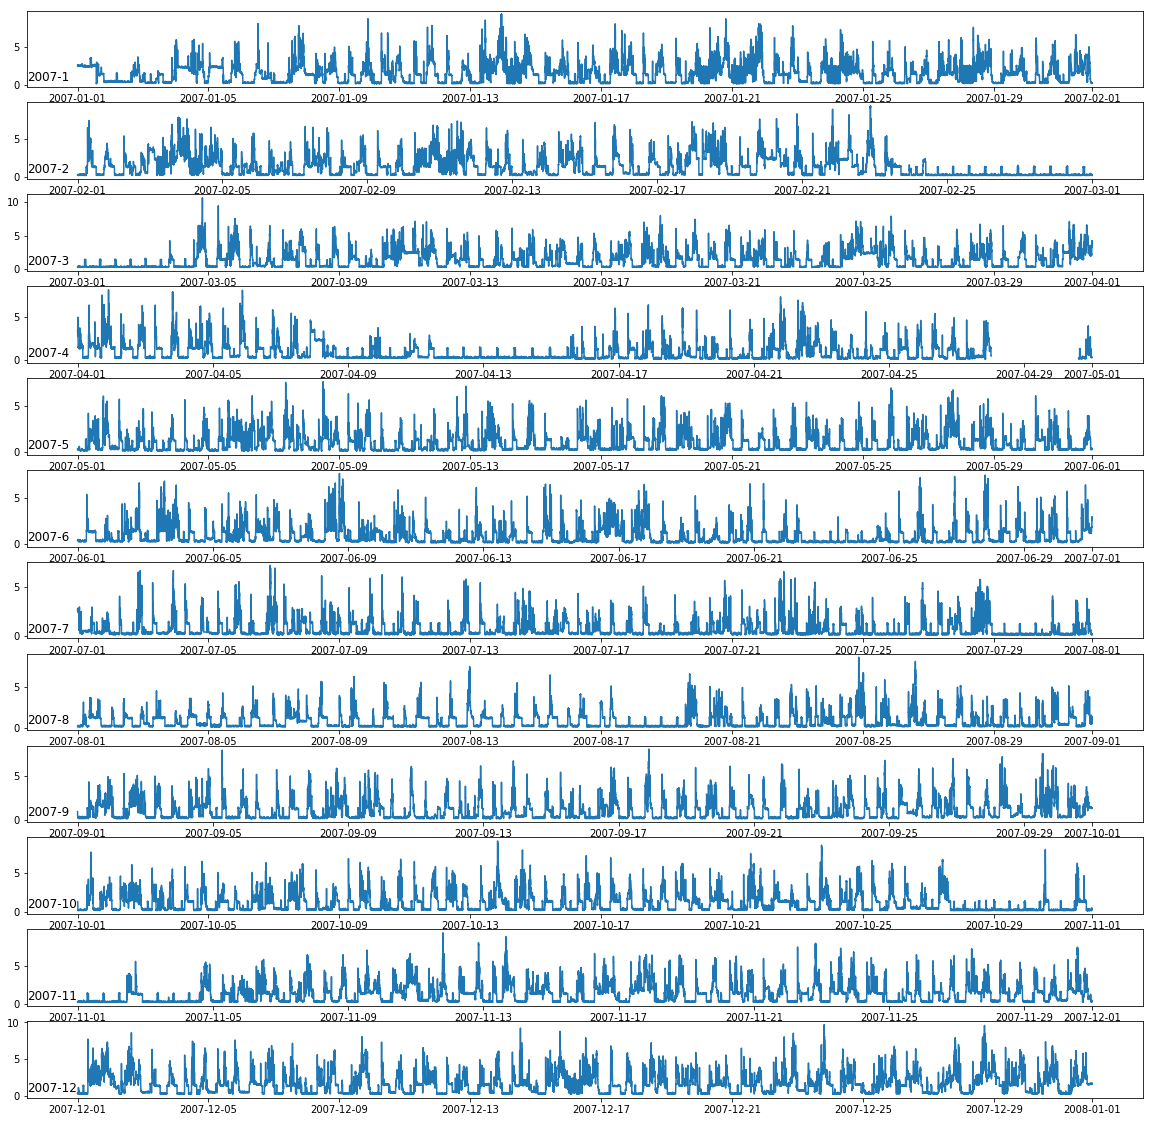

In [94]:
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure(figsize(20,20))

for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    
    # determine the month to plot
    month = '2007-' + str(months[i])
    
    # get all observations for the month
    result = dataset[month]
    
    # plot the active power for the month
    pyplot.plot(result['Global_active_power'])
    
    # add a title to the subplot
    pyplot.title(month, y=0, loc='left')
pyplot.show()

We can see the sign-wave of power consumption of the days within each month. This is good as we would expect some kind of daily pattern in power consumption.
We can see that there are stretches of days with very minimal consumption, such as in August and in April. These may represent vacation periods where the home was unoccupied and where power consumption was minimal.

Finally, we can zoom in one more level and take a closer look at power consumption at the daily level.
We would expect there to be some pattern to consumption each day, and perhaps differences in days over a week.

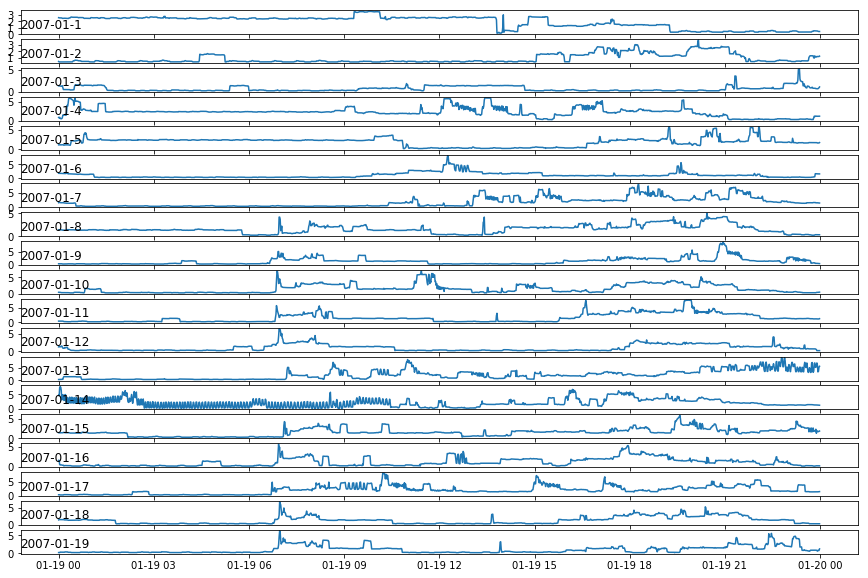

In [98]:
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure(figsize(15,10))

for i in range(len(days)):
    # prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
   
    # determine the day to plot
    day = '2007-01-' + str(days[i])
    
    # get all observations for the day
    result = dataset[day]
    
    # plot the active power for the day
    pyplot.plot(result['Global_active_power'])
    
    # add a title to the subplot
    pyplot.title(day, y=0, loc='left')
pyplot.show()

Running the example creates a single image with 20 line plots, one for the first 20 days in January 2007.
There is commonality across the days; for example, many days consumption starts early morning, around 6-7AM.
Some days show a drop in consumption in the middle of the day, which might make sense if most occupants are out of the house.
We do see some strong overnight consumption on some days, that in a northern hemisphere January may match up with a heating system being used.
Time of year, specifically the season and the weather that it brings, will be an important factor in modeling this data, as would be expected.

# Time Series Data Distributions
Another important area to consider is the distribution of the variables.
For example, it may be interesting to know if the distributions of observations are Gaussian or some other distribution.
We can investigate the distributions of the data by reviewing histograms.
We can start-off by creating a histogram for each variable in the time series.

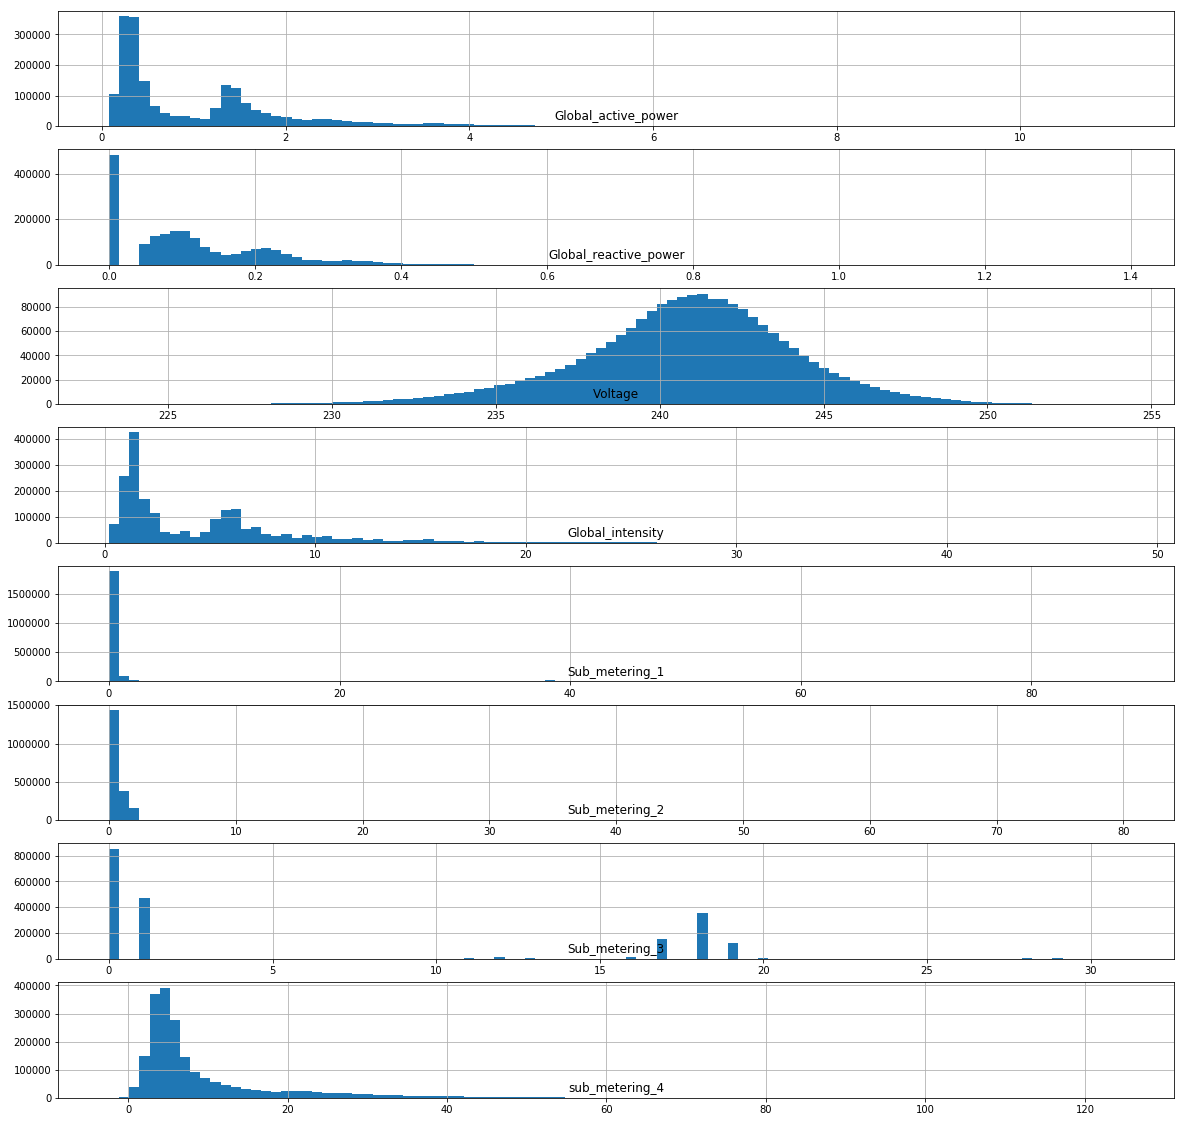

In [99]:
# histogram plot for each variable
pyplot.figure(figsize(20,20))

for i in range(len(dataset.columns)):
    pyplot.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    dataset[name].hist(bins=100)
    pyplot.title(name, y=0)
pyplot.show()

Running the code creates a single figure with a separate histogram for each of the 8 variables.
We can see that active and reactive power, intensity, as well as the sub-metered power are all skewed distributions down towards small watt-hour or kilowatt values.
We can also see that distribution of voltage data is strongly Gaussian.

The distribution of active power appears to be bi-modal, meaning it looks like it has two mean groups of observations.
We can investigate this further by looking at the distribution of active power consumption for the four full years of data.

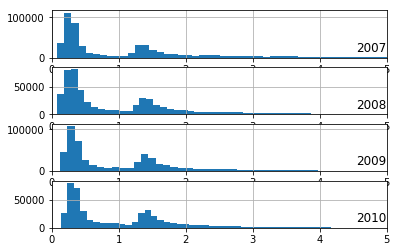

In [48]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()

for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    
    # determine the year to plot
    year = years[i]
    
    # get all observations for the year
    result = dataset[str(year)]
    
    # plot the active power for the year
    result['Global_active_power'].hist(bins=100)
    
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    
    # add a title to the subplot
    pyplot.title(str(year), y=0, loc='right')
pyplot.show()

Running the code creates a single plot with four figures, one for each of the years between 2007 to 2010.
We can see that the distribution of active power consumption across those years looks very similar. The distribution is indeed bimodal with one peak around 0.3 KW and perhaps another around 1.3 KW.
There is a long tail on the distribution to higher kilowatt values. It might open the door to notions of discretizing the data and separating it into peak 1, peak 2 or long tail. These groups or clusters for usage on a day or hour may be helpful in developing a predictive model.


It is possible that the identified groups may vary over the seasons of the year.
We can investigate this by looking at the distribution for active power for each month in a year.

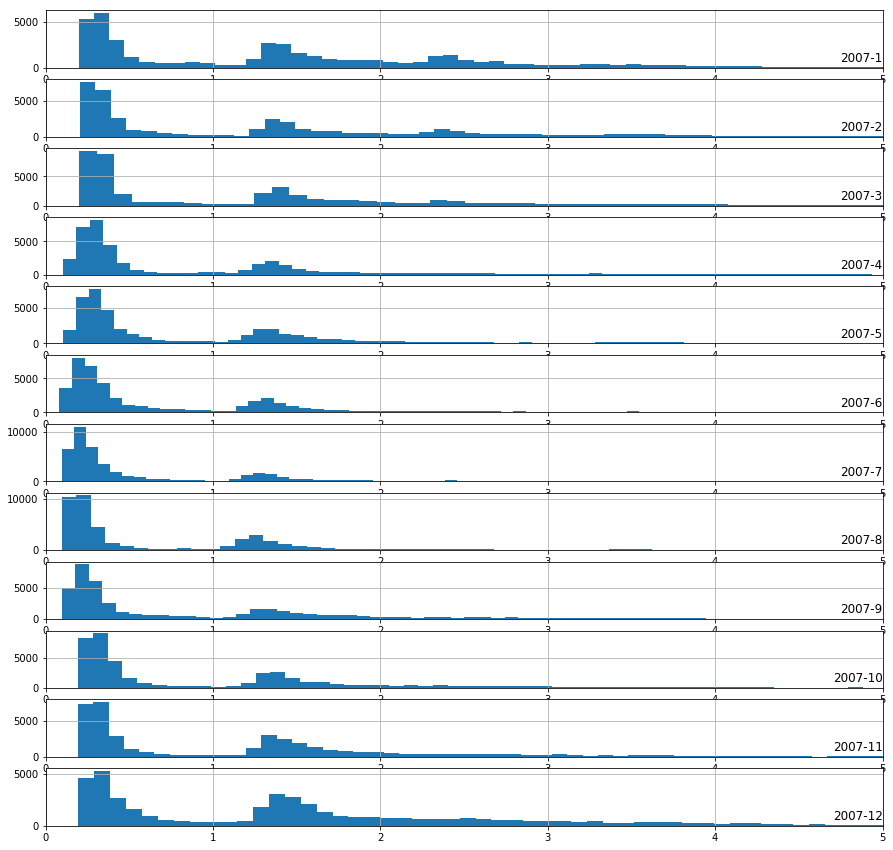

In [100]:
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure(figsize(15,15))

for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
   
    # determine the month to plot
    month = '2007-' + str(months[i])
   
    # get all observations for the month
    result = dataset[month]
    
    # plot the active power for the month
    result['Global_active_power'].hist(bins=100)
    
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    
    # add a title to the subplot
    pyplot.title(month, y=0, loc='right')
pyplot.show()

Running the code creates an image with 12 plots, one for each month in 2007.
We can see generally the same data distribution each month. The axes for the plots appear to align (given the similar scales), and we can see that the peaks are shifted down in the warmer northern hemisphere months and shifted up for the colder months.
We can also see a thicker or more prominent tail toward larger kilowatt values for the cooler months of December through to March.

# Ideas on Modeling
Now that have loaded and explored the dataset, we can pose some ideas on how to model the dataset.

# Problem Framing
There does not appear to be a seminal publication for the dataset to demonstrate the intended way to frame the data in a predictive modeling problem.

We are therefore left to guess at possibly useful ways that this data may be used.
The data is only for a single household, but perhaps effective modeling approaches could be generalized across to similar households.
Perhaps the most useful framing of the dataset is to forecast an interval of future active power consumption.

Four examples include:
1. Forecast hourly consumption for the next day.
2. Forecast daily consumption for the next week.
3. Forecast daily consumption for the next month.
4. Forecast monthly consumption for the next year.

Generally, these types of forecasting problems are referred to as multi-step forecasting. Models that make use of all of the variables might be referred to as a multivariate multi-step forecasting models.

Each of these models is not limited to forecasting the minutely data, but instead could model the problem at or below the chosen forecast resolution.

Forecasting consumption in turn, at scale, could aid in a utility company forecasting demand, which is a widely studied and important problem.

# Forecast daily consumption for the next week.

This requires that a predictive model forecast the total active power for each day over the next seven days. 
Technically, this framing of the problem is referred to as a multi-step time series forecasting problem, given the multiple forecast steps. A model that makes use of multiple input variables may be referred to as a multivariate multi-step time series forecasting model.

A model of this type could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning electricity demand for a specific household.

This framing of the dataset also suggests that it would be useful to downsample the per-minute observations of power consumption to daily totals. This is not required, but makes sense, given that we are interested in total power per day.

We can achieve this easily using the resample() function on the pandas DataFrame. Calling this function with the argument ‘D‘ allows the loaded data indexed by date-time to be grouped by day (see all offset aliases). We can then calculate the sum of all observations for each day and create a new dataset of daily power consumption data for each of the eight variables.

In [50]:
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()

# summarize
print(daily_data.shape)
print(daily_data.head())

# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313

Running the code creates a new daily total power consumption dataset and saves the result into a separate file named ‘household_power_consumption_days.csv‘.
We can use this as the dataset for fitting and evaluating predictive models for the chosen framing of the problem.

# Evaluation Metric
A forecast will be comprised of seven values, one for each day of the week ahead.

It is common with multi-step forecasting problems to evaluate each forecasted time step separately. This is helpful for a few reasons:
1. To comment on the skill at a specific lead time (e.g. +1 day vs +3 days).
2. To contrast models based on their skills at different lead times (e.g. models good at +1 day vs models good at days +5).

The units of the total power are kilowatts and it would be useful to have an error metric that was also in the same units. Both Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) fit this bill, although RMSE is more commonly used and will be adopted in this tutorial. Unlike MAE, RMSE is more punishing of forecast errors.

The performance metric for this problem will be the RMSE for each lead time from day 1 to day 7.
As a short-cut, it may be useful to summarize the performance of a model using a single score in order to aide in model selection.
One possible score that could be used would be the RMSE across all forecast days.

The function evaluate_forecasts() below will implement this behavior and return the performance of a model based on multiple seven-day forecasts.

In [51]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

# Train and Test Sets
We will use the first three years of data for training predictive models and the final year for evaluating models.

The data in a given dataset will be divided into standard weeks. These are weeks that begin on a Sunday and end on a Saturday.

This is a realistic and useful way for using the chosen framing of the model, where the power consumption for the week ahead can be predicted. It is also helpful with modeling, where models can be used to predict a specific day (e.g. Wednesday) or the entire sequence.

We will split the data into standard weeks, working backwards from the test dataset.
The final year of the data is in 2010 and the first Sunday for 2010 was January 3rd. The data ends in mid November 2010 and the closest final Saturday in the data is November 20th. This gives 46 weeks of test data.

The function split_dataset() below splits the daily data into train and test sets and organizes each into standard weeks.
Specific row offsets are used to split the data using knowledge of the dataset. The split datasets are then organized into weekly data using the NumPy split() function.

In [52]:
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]

    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

We can test this function out by loading the daily dataset and printing the first and last rows of data from both the train and test sets to confirm they match the expectations above.

In [53]:
# split into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
 
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)

# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])

# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1308.8359999999998
(46, 7, 8)
2083.4539999999984 2197.006000000004


Running the code shows that the train dataset has 159 weeks of data, whereas the test dataset has 46 weeks.
We can see that the total active power for the train and test dataset for the first and last rows match the data for the specific dates that we defined as the bounds on the standard weeks for each set.

# Walk-Forward Validation
Models will be evaluated using a scheme called walk-forward validation.
This is where a model is required to make a one week prediction, then the actual data for that week is made available to the model so that it can be used as the basis for making a prediction on the subsequent week. This is both realistic for how the model may be used in practice and beneficial to the models allowing them to make use of the best available data.

The walk-forward validation approach to evaluating predictive models on this dataset is implement below, named evaluate_model().

The name of a function is provided for the model as the argument “model_func“. This function is responsible for defining the model, fitting the model on the training data, and making a one-week forecast.

The forecasts made by the model are then evaluated against the test dataset using the previously defined evaluate_forecasts() function.

In [54]:
# evaluate a single model
def evaluate_model(model_func, train, test):
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    
    for i in range(len(test)):
        # predict the week
        yhat_sequence = model_func(history)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
   
    predictions = array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

Once we have the evaluation for a model, we can summarize the performance.
The function below named summarize_scores() will display the performance of a model as a single line for easy comparison with other models.

In [55]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

We now have all of the elements to begin evaluating predictive models on the dataset.

# Autocorrelation Analysis

In order to calculate and plot the autocorrelation, we must convert the data into a univariate time series. Specifically, the observed daily total power consumed.
The to_series() function below will take the multivariate data divided into weekly windows and will return a single univariate time series.

In [56]:
# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

We can call this function for the prepared training dataset.

First, the daily power consumption dataset must be loaded.

In [57]:
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

The dataset must then be split into train and test sets with the standard week window structure

In [58]:
# split into train and test
train, test = split_dataset(dataset.values)

A univariate time series of daily power consumption can then be extracted from the training dataset.

In [60]:
# convert training data into a series
series = to_series(train)

We can then create a single figure that contains both an ACF and a PACF plot. The number of lag time steps can be specified. We will fix this to be one year of daily observations, or 365 days.

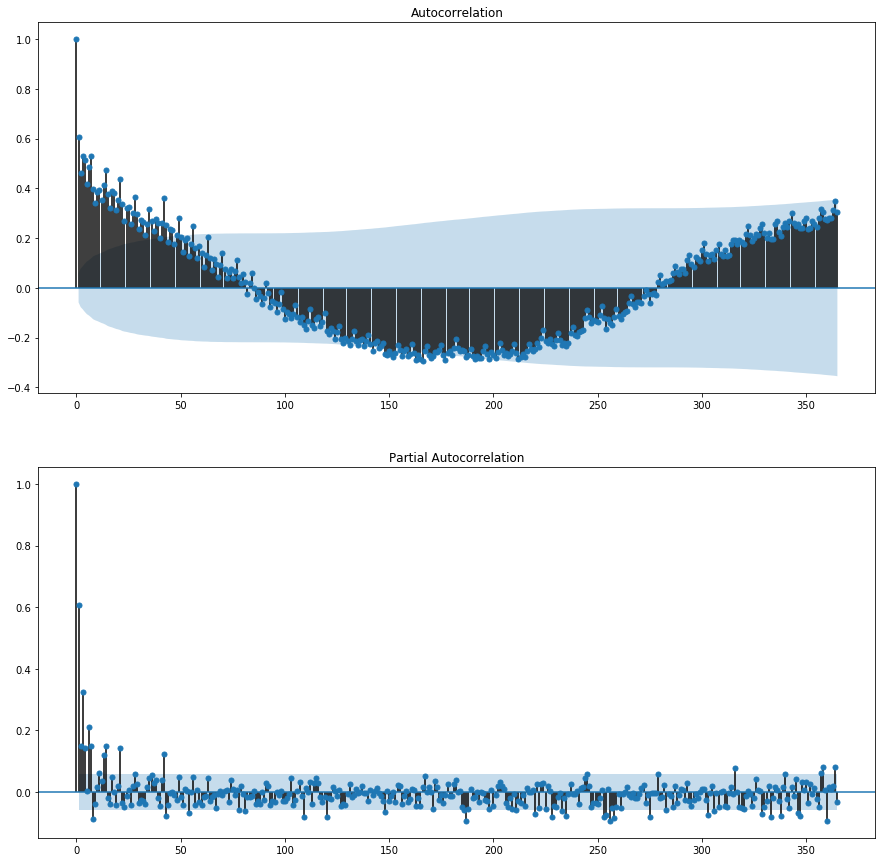

In [102]:
# plots
pyplot.figure()
lags = 365
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()

The complete example is listed below.
We would expect that the power consumed tomorrow and in the coming week will be dependent upon the power consumed in the prior days. As such, we would expect to see a strong autocorrelation signal in the ACF and PACF plots.

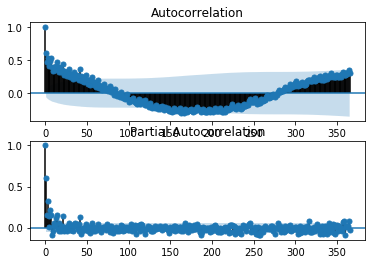

In [64]:

# acf and pacf plots of total power
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series
 
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

# split into train and test
train, test = split_dataset(dataset.values)

# convert training data into a series
series = to_series(train)

# plots
pyplot.figure()
lags = 365

# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)

# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)

# show plot
pyplot.show()

Running the code creates a single figure with both ACF and PACF plots.

The plots are very dense, and hard to read. Nevertheless, we might be able to see a familiar autoregression pattern.

We might also see some significant lag observations at one year out. Further investigation may suggest a seasonal autocorrelation component, which would not be a surprising finding.

We can zoom in the plot and change the number of lag observations from 365 to 50.

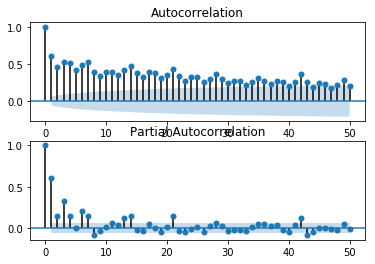

In [65]:
# plots
pyplot.figure()
lags = 50
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()

Re-running the code  with this change results is a zoomed-in version of the plots with much less clutter.

We can clearly see a familiar autoregression pattern across the two plots. This pattern is comprised of two elements:

1. ACF: A large number of significant lag observations that slowly degrade as the lag increases.
2. PACF: A few significant lag observations that abruptly drop as the lag increases.

The ACF plot indicates that there is a strong autocorrelation component, whereas the PACF plot indicates that this component is distinct for the first approximately seven lag observations.

This suggests that a good starting model would be an AR(7); that is an autoregression model with seven lag observations used as input.

# Develop an Autoregression Model

We can develop an autoregression model for univariate series of daily power consumption.
The Statsmodels library provides multiple ways of developing an AR model, such as using the AR, ARMA, ARIMA, and SARIMAX classes.

We will use the ARIMA implementation as it allows for easy expandability into differencing and moving average.
First, the history data comprised of weeks of prior observations must be converted into a univariate time series of daily power consumption. We can use the to_series() function developed in the previous section.

In [ ]:
# convert history into a univariate series
series = to_series(history)

Next, an ARIMA model can be defined by passing arguments to the constructor of the ARIMA class.

We will specify an AR(7) model, which in ARIMA notation is ARIMA(7,0,0).

In [ ]:
# define the model
model = ARIMA(series, order=(7,0,0))

Next, the model can be fit on the training data. We will use the defaults and disable all debugging information during the fit by setting disp=False.

In [ ]:
# fit the model
model_fit = model.fit(disp=False)

Now that the model has been fit, we can make a prediction.

A prediction can be made by calling the predict() function and passing it either an interval of dates or indices relative to the training data. We will use indices starting with the first time step beyond the training data and extending it six more days, giving a total of a seven day forecast period beyond the training dataset.

In [ ]:
# make forecast
yhat = model_fit.predict(len(series), len(series)+6)

We can wrap all of this up into a function below named arima_forecast() that takes the history and returns a one week forecast.

In [103]:
# arima forecast
def arima_forecast(history):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = ARIMA(series, order=(7,0,0))
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat

This function can be used directly in the test harness described previously.
The complete example is as below.

C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. I

arima: [465.912] 428.1, 448.9, 395.8, 522.3, 450.5, 380.5, 598.0


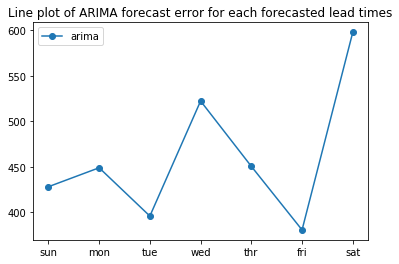

In [69]:
# arima forecast
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
 
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))
 
    # evaluate a single model
def evaluate_model(model_func, train, test):
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = model_func(history)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    predictions = array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores
 
# convert windows of weekly multivariate data into a series of total power
def to_series(data):
	# extract just the total power from each week
	series = [week[:, 0] for week in data]
	# flatten into a single series
	series = array(series).flatten()
	return series
 
# arima forecast
def arima_forecast(history):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = ARIMA(series, order=(7,0,0))
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat
 
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

# split into train and test
train, test = split_dataset(dataset.values)

# define the names and functions for the models we wish to evaluate
models = dict()
models['arima'] = arima_forecast

# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
for name, func in models.items():
    # evaluate and get scores
    score, scores = evaluate_model(func, train, test)
    # summarize scores
    summarize_scores(name, score, scores)
    # plot scores
    pyplot.plot(days, scores, marker='o', label=name)
    
# show plot
pyplot.title('Line plot of ARIMA forecast error for each forecasted lead times')
pyplot.legend()
pyplot.show()


Running the code first prints the performance of the AR(7) model on the test dataset.

We can see that the model achieves the overall RMSE of about 381 kilowatts.


A line plot of the forecast is also created, showing the RMSE in kilowatts for each of the seven lead times of the forecast.

We can see an interesting pattern.

We might expect that earlier lead times are easier to forecast than later lead times, as the error at each successive lead time compounds.

Instead, we see that Friday (lead time +6) is the easiest to forecast and Saturday (lead time +7) is the most challenging to forecast. We can also see that the remaining lead times all have a similar error in the mid- to high-300 kilowatt range.